In [ ]:
#pip install ffn

In [81]:
import ffn
%pylab inline
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
sns.set_style("whitegrid")

Populating the interactive namespace from numpy and matplotlib


In [10]:
#get method gets stock data and returns a dataframe of stock data
#can pass in multiple stocks seperated by commas
#can specify what price you want (open, high, low) and end date
prices = ffn.get("msft,aapl", start = "2010-01-01")

#can use pandas methods to get a basic idea of the data
#can also use data.csv() to load data from a csv

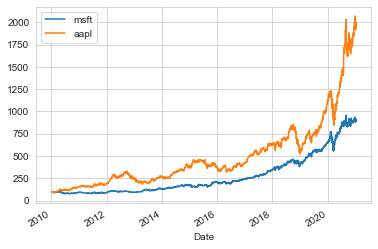

In [35]:
#rebase so that we get a common starting price in the plot, default is 100
#rebase so we see how they performed compared to each other
prices.rebase().plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe0fb40edf0>,
      dtype=object)

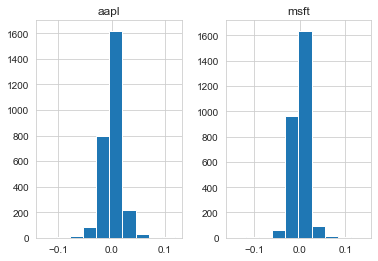

In [36]:
returns = prices.to_returns().dropna()
returns.hist()

In [15]:
stats = prices.calc_stats()
stats.display()
#MTD stands for month to date, period starting from the beginning of the current month up until now

Stat                 msft        aapl
-------------------  ----------  ----------
Start                2010-01-04  2010-01-04
End                  2021-01-11  2021-01-11
Risk-free rate       0.00%       0.00%

Total Return         802.25%     1856.19%
Daily Sharpe         0.91        1.10
Daily Sortino        1.52        1.82
CAGR                 22.09%      30.98%
Max Drawdown         -28.04%     -43.80%
Calmar Ratio         0.79        0.71

MTD                  -2.22%      -2.80%
3m                   1.04%       10.46%
6m                   2.30%       34.94%
YTD                  -2.22%      -2.80%
1Y                   36.23%      67.68%
3Y (ann.)            37.07%      45.15%
5Y (ann.)            35.42%      41.38%
10Y (ann.)           25.55%      28.47%
Since Incep. (ann.)  22.09%      30.98%

Daily Sharpe         0.91        1.10
Daily Sortino        1.52        1.82
Daily Mean (ann.)    23.22%      31.05%
Daily Vol (ann.)     25.40%      28.33%
Daily Skew           0.04        -0

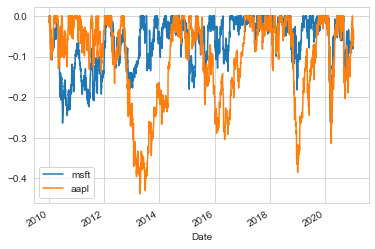

In [76]:
stats.prices.to_drawdown_series().plot()

In [31]:
returns.corr().as_format('.2f') #as format used to round to 2 decimal places 

,msft,aapl
msft,1.00,0.56
aapl,0.56,1.00


<module 'matplotlib.pyplot' from '/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/pyplot.py'>

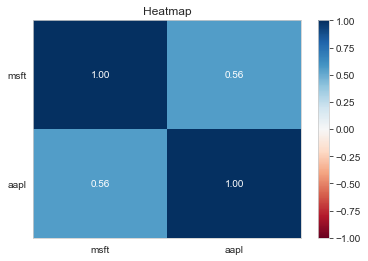

In [37]:
#built in headmap correlation plot
returns.plot_corr_heatmap()

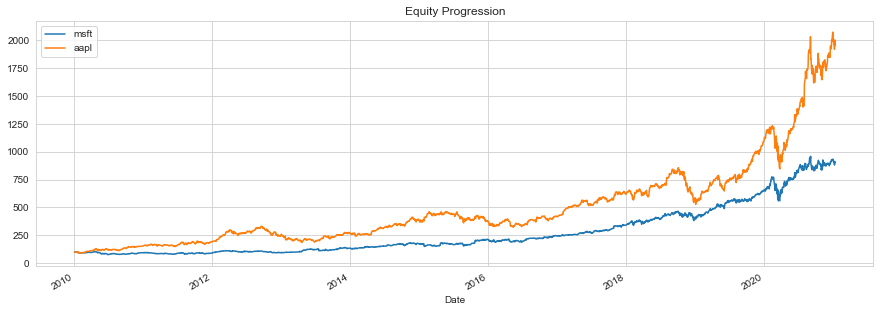

In [77]:
stats.plot()

In [47]:
type(stats)
#GroupStats object is a dictionary where the keys are the tickers and the values are Performance objects for each ticker

ffn.core.GroupStats

In [54]:
stats["aapl"].display()

Stats for aapl from 2010-01-04 00:00:00 - 2021-01-11 00:00:00
Annual risk-free rate considered: 0.00%
Summary:
Total Return      Sharpe  CAGR    Max Drawdown
--------------  --------  ------  --------------
1856.19%             1.1  30.98%  -43.80%

Annualized Returns:
mtd     3m      6m      ytd     1y      3y      5y      10y     incep.
------  ------  ------  ------  ------  ------  ------  ------  --------
-2.80%  10.46%  34.94%  -2.80%  67.68%  45.15%  41.38%  28.47%  30.98%

Periodic:
        daily    monthly    yearly
------  -------  ---------  --------
sharpe  1.10     1.17       0.90
mean    31.05%   31.99%     29.80%
vol     28.33%   27.30%     33.01%
skew    -0.10    -0.11      0.78
kurt    6.03     -0.24      -0.44
best    11.98%   21.66%     88.96%
worst   -12.86%  -18.12%    -5.39%

Drawdowns:
max      avg       # days
-------  ------  --------
-43.80%  -4.09%     29.09

Misc:
---------------  ------
avg. up month    7.70%
avg. down month  -5.08%
up year %        72.73%


In [56]:
stats["aapl"].display_lookback_returns()

mtd      -2.80%
3m       10.46%
6m       34.94%
ytd      -2.80%
1y       67.68%
3y       45.15%
5y       41.38%
10y      28.47%
incep    30.98%
Name: aapl, dtype: object

In [63]:
stats["msft"].stats

start                    2010-01-04 00:00:00
end                      2021-01-11 00:00:00
rf                                         0
total_return                         8.02247
cagr                                0.220932
max_drawdown                       -0.280393
calmar                              0.787937
mtd                               -0.0221652
three_month                        0.0104231
six_month                          0.0230099
ytd                               -0.0221652
one_year                            0.362303
three_year                          0.370748
five_year                           0.354203
ten_year                            0.255463
incep                               0.220932
daily_sharpe                         0.91405
daily_sortino                        1.52436
daily_mean                           0.23216
daily_vol                           0.253991
daily_skew                         0.0438325
daily_kurt                           9.90852
best_day  

In [66]:
stats["msft"].return_table

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,YTD
2010,-0.089499,0.022146,0.021625,0.042677,-0.151394,-0.108140,0.121687,-0.085812,0.043460,0.089016,-0.047049,0.104909,-0.079441
2011,-0.006449,-0.035806,-0.044770,0.020874,-0.028784,0.039585,0.053846,-0.023070,-0.064286,0.069908,-0.032196,0.014855,-0.045157
2012,0.137519,0.081915,0.016383,-0.007440,-0.082401,0.047962,-0.036613,0.052738,-0.034394,-0.040994,-0.059609,0.003381,0.057989
2013,0.027705,0.021136,0.029137,0.156938,0.061774,-0.010315,-0.078170,0.056387,-0.003593,0.064002,0.084981,-0.018883,0.442979
2014,0.011494,0.020013,0.069956,-0.014394,0.020515,0.018564,0.035012,0.059169,0.020471,0.012727,0.024740,-0.028446,0.275646
2015,-0.130247,0.093120,-0.072748,0.196261,-0.030334,-0.057832,0.057758,-0.061949,0.017004,0.189336,0.039444,0.020791,0.226919
2016,-0.007030,-0.069789,0.085495,-0.097049,0.070197,-0.034528,0.107680,0.020080,0.002436,0.040278,0.012468,0.031198,0.150777
2017,0.040393,-0.004364,0.029384,0.039478,0.026005,-0.013030,0.054693,0.033953,-0.003745,0.116660,0.016984,0.016277,0.407306
2018,0.110708,-0.008415,-0.026661,0.024652,0.061467,-0.002327,0.075753,0.062993,0.018161,-0.066101,0.042684,-0.084047,0.207953
2019,0.028158,0.077358,0.052754,0.107343,-0.049481,0.083118,0.017244,0.015037,0.008487,0.031216,0.059463,0.041749,0.575581


In [72]:
returns.calc_mean_var_weights()

msft    0.368624
aapl    0.631376
dtype: float64

In [73]:
stats.prices

,msft,aapl
Date,,
2010-01-04,24.105360,6.593423
2010-01-05,24.113148,6.604822
2010-01-06,23.965164,6.499765
2010-01-07,23.715933,6.487749
2010-01-08,23.879499,6.530882
...,...,...
2021-01-05,217.899994,131.009995
2021-01-06,212.250000,126.599998
2021-01-07,218.289993,130.919998


In [109]:
ffn.calc_cagr(prices)

msft    0.220932
aapl    0.309754
dtype: float64

In [110]:
ffn.calc_calmar_ratio(prices)

msft    0.787937
aapl    0.707246
dtype: float64

{0: ['msft', 'aapl']}

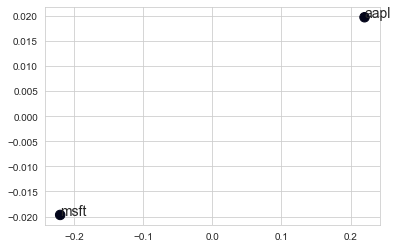

In [113]:
ffn.calc_clusters(returns, n = 1, plot = True)